### Newsvendor Problem (week 8)

In [2]:
p = 10  # selling price
c = 3  # purchasing costs
s = 2  # salvage price

binom_p = 0.5  # demand probability
binom_n = 100  # max. demand 

print(f"Expected demand: {binom_n * binom_p}")
print(f"Standard deviation: {binom_n * binom_p * (1-binom_p)}")

Expected demand: 50.0
Standard deviation: 25.0


In [4]:
from scipy.stats import binom

c_o = c - s
c_u = p - c
critical_ratio = c_u / (c_u + c_o)
print(f"Critical ratio: {critical_ratio}")
for i in range(binom_n):
    if binom.cdf(i, binom_n, binom_p) >= critical_ratio:
        y = i
        break
print(f"Order quantity: {y}")

Critical ratio: 0.875
Order quantity: 56


### Simulation

In [7]:
import pandas as pd
import numpy as np

seed = 12345
random = np.random.default_rng(seed=seed)

n_days = 100

demands = binom.rvs(binom_n, binom_p, size=n_days)
mean = sum([demands[i] for i in range(n_days)]) / n_days
standard_deviation = sum([(demands[i]-mean)**2 for i in range(n_days)]) / n_days
print(f"Mean: {mean}, standard deviation: {standard_deviation}")

overage = {}
underage = {}
profit = {}
for i in range(n_days):
    overage[i] = max(y-demands[i], 0)
    underage[i] = max(demands[i]-y, 0)
    profit[i] = p * min(y, demands[i]) - c * y + s * overage[i]

    
pd.DataFrame(
    [[i, demands[i], overage[i], underage[i], profit[i]] for i in range(n_days)], 
    columns=["Day", "Demand", "Overage", "Underage", "Profit"])

Mean: 49.93, standard deviation: 25.065099999999987


,Day,Demand,Overage,Underage,Profit
0,0,45,11,0,304
1,1,47,9,0,320
2,2,49,7,0,336
3,3,48,8,0,328
4,4,45,11,0,304
...,...,...,...,...,...
95,95,57,0,1,392
96,96,53,3,0,368
97,97,46,10,0,312
98,98,49,7,0,336


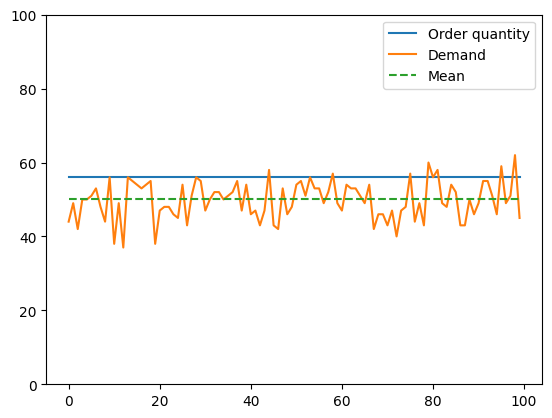

In [6]:
from matplotlib import pyplot as plt

plt.plot(range(n_days), [y for i in range(n_days)], label='Order quantity')
plt.plot(range(n_days), demands, label='Demand')
plt.plot(range(n_days), [binom_n * binom_p for i in range(n_days)], linestyle='dashed', label='Mean')
plt.legend()
plt.ylim(0, binom_n)
plt.show()